In [15]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import math
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import datetime as dt
%matplotlib inline
import os
import sys
from tqdm import tqdm
sys.path.append('/home/basil/Desktop/cape_mend_SM_LCS/datatools')
import datatools as tools
import cmocean as cm
from scipy.interpolate import griddata
import gsw

In [2]:
ds = xr.open_dataset('./complete_davis_subsample_file.nc')

In [3]:
ds = ds.sel(depth=slice(200,500),x=slice(180,210))

In [4]:
#salinity fluxes
area = ds['area']
sal_270 = ds['salinity_270']
sal_1080 = ds['salinity_1080']
sal_obs = ds['salinity']
temp_270 = ds['temperature_270']
temp_1080 = ds['temperature_1080']
temp_obs = ds['temperature']
vel_obs = ds['velocity']
vel_270 = ds['velocity_270']
vel_1080 = ds['velocity_1080']
sal_flux_270 = area*sal_270*vel_270
sal_flux_1080 = area*sal_1080*vel_1080
sal_flux_obs = area*sal_obs*vel_obs
temp_flux_270 = area*temp_270*vel_270
temp_flux_1080 = area*temp_1080*vel_1080
temp_flux_obs = area*temp_obs*vel_obs

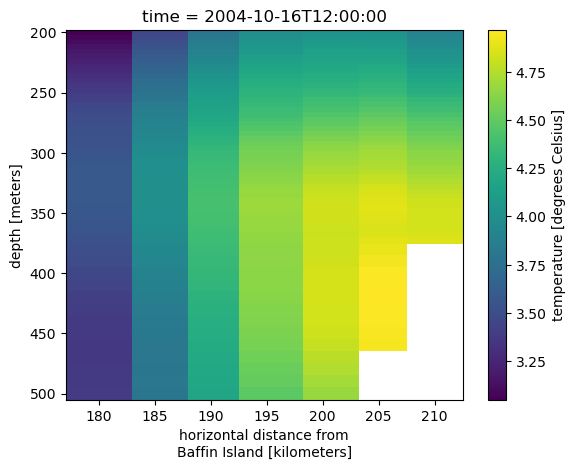

In [5]:
ds['temperature'].isel(time=0).plot(x='x')
plt.gca().invert_yaxis()
plt.savefig('./depth_cut_cross_section.png')

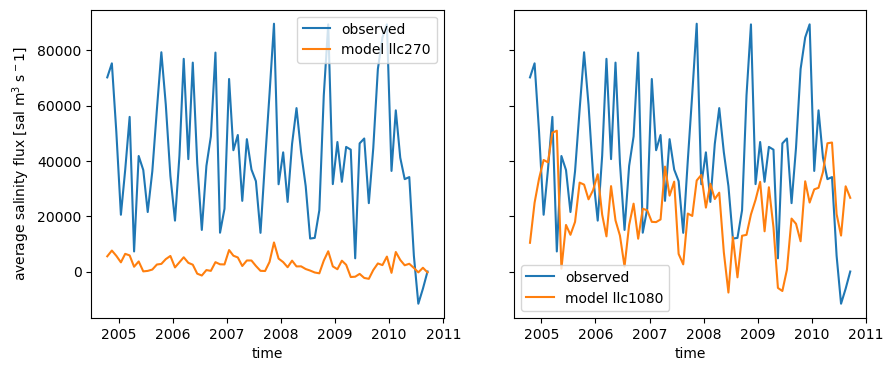

In [6]:
fig,ax = plt.subplots(ncols=2, nrows=1,figsize=(10,4),sharex=True,sharey=True,)

sal_flux_obs.mean(dim='depth',skipna=True).mean(dim='x',skipna=True).plot(ax=ax[0],label='observed')
sal_flux_obs.mean(dim='depth',skipna=True).mean(dim='x',skipna=True).plot(ax=ax[1],label='observed')

sal_flux_1080.mean(dim='depth',skipna=True).mean(dim='x',skipna=True).plot(ax=ax[1],label='model llc1080')
sal_flux_270.mean(dim='depth',skipna=True).mean(dim='x',skipna=True).plot(ax=ax[0],label='model llc270')
ax[0].set_ylabel('average salinity flux [sal m$^3$ s$^-1$]')
ax[0].legend()
ax[1].legend()
plt.savefig('./sal_flux_ave.png')

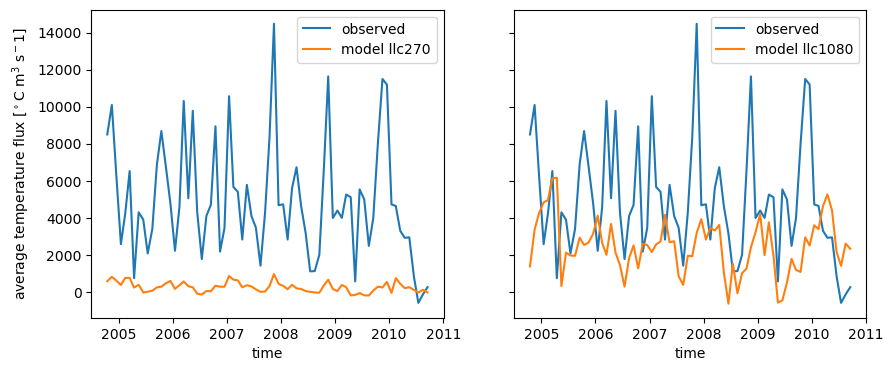

In [7]:
fig,ax = plt.subplots(ncols=2, nrows=1,figsize=(10,4),sharex=True,sharey=True,)

temp_flux_obs.mean(dim='depth',skipna=True).mean(dim='x',skipna=True).plot(ax=ax[0],label='observed')
temp_flux_obs.mean(dim='depth',skipna=True).mean(dim='x',skipna=True).plot(ax=ax[1],label='observed')

temp_flux_1080.mean(dim='depth',skipna=True).mean(dim='x',skipna=True).plot(ax=ax[1],label='model llc1080')
temp_flux_270.mean(dim='depth',skipna=True).mean(dim='x',skipna=True).plot(ax=ax[0],label='model llc270')
ax[0].set_ylabel('average temperature flux [$^\circ$C m$^3$ s$^-1$]')
ax[0].legend()
ax[1].legend()
plt.savefig('./temp_flux_ave.png')

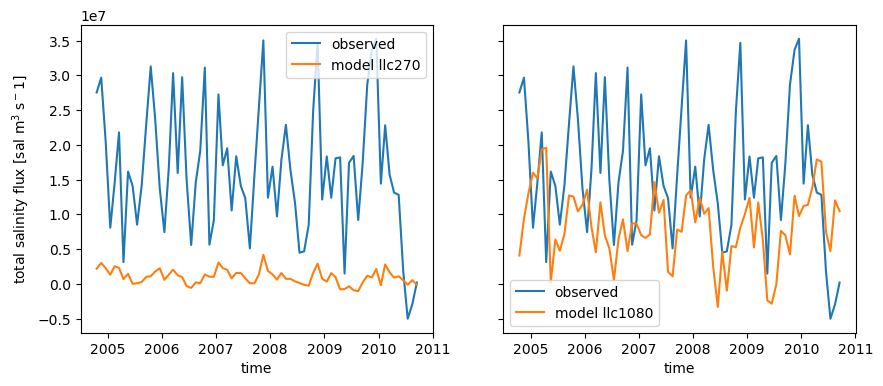

In [8]:
fig,ax = plt.subplots(ncols=2, nrows=1,figsize=(10,4),sharex=True,sharey=True,)

sal_flux_obs.sum(dim='depth',skipna=True).sum(dim='x',skipna=True).plot(ax=ax[0],label='observed')
sal_flux_obs.sum(dim='depth',skipna=True).sum(dim='x',skipna=True).plot(ax=ax[1],label='observed')

sal_flux_1080.sum(dim='depth',skipna=True).sum(dim='x',skipna=True).plot(ax=ax[1],label='model llc1080')
sal_flux_270.sum(dim='depth',skipna=True).sum(dim='x',skipna=True).plot(ax=ax[0],label='model llc270')
ax[0].set_ylabel('total salinity flux [sal m$^3$ s$^-1$]')
ax[0].legend()
ax[1].legend()
plt.savefig('./sal_flux_total.png')

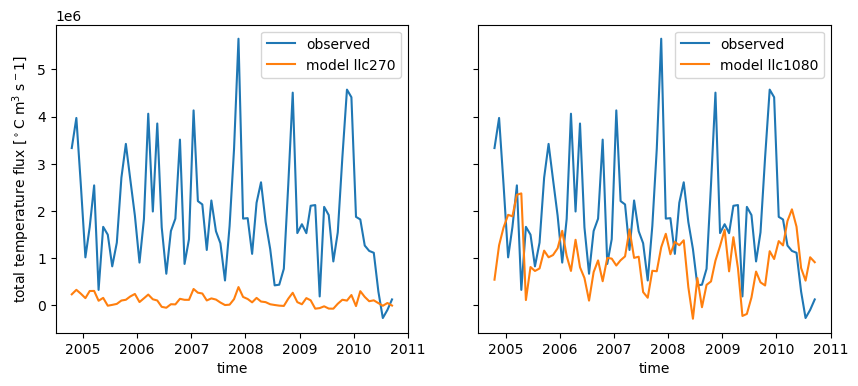

In [9]:
fig,ax = plt.subplots(ncols=2, nrows=1,figsize=(10,4),sharex=True,sharey=True,)

temp_flux_obs.isel(depth=slice(0,len(temp_flux_obs['depth']))).sum(dim='depth',skipna=True).sum(dim='x',skipna=True).plot(ax=ax[0],label='observed')
temp_flux_obs.sum(dim='depth',skipna=True).sum(dim='x',skipna=True).plot(ax=ax[1],label='observed')

temp_flux_1080.sum(dim='depth',skipna=True).sum(dim='x',skipna=True).plot(ax=ax[1],label='model llc1080')
temp_flux_270.sum(dim='depth',skipna=True).sum(dim='x',skipna=True).plot(ax=ax[0],label='model llc270')
ax[0].set_ylabel('total temperature flux [$^\circ$C m$^3$ s$^-1$]')
ax[0].legend()
ax[1].legend()

plt.savefig('./temp_flux_total.png')

In [40]:
temp_flux_obs.sum(dim)

<xarray.DataArray (x: 70, depth: 159, time: 72)>
array([[[ 2.47651978e+02,  1.26060498e+03,  6.28102478e+02, ...,
          1.55896698e+02,  4.34162750e+02, -1.28431726e+03],
        [ 2.31593903e+02,  1.13471729e+03,  5.68948425e+02, ...,
          1.34866150e+02,  3.55716034e+02, -1.20204614e+03],
        [ 2.12599731e+02,  1.00997278e+03,  5.09769714e+02, ...,
          1.15704422e+02,  2.85000275e+02, -1.11732336e+03],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[ 4.10952179e+02,  2.68487500e+03,  1.18701929e+03, ...,
          4.23323486e+02,  7.82024902e+02, -2.72995581e+03],
        [ 4.27149078e+02,  2.66492407e+03,  1.18537622e+03, ...,
          4.04730896e+02,  7.21334473e+02, -2.78693652e+03],
        [ 4.41860077e+02,  2.64429395e+03,  1.18365662e+03, ...,
          3.86681305e+02,  6.56493958e+02, -2.85557397e+03],
...
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[ 1.35982727e+03,  7.22739502e+02, -1.15243845e+01, ...,
          3.38661469e+02,  1.09649622e+03,  2.01402576e+03],
        [ 9.79284546e+02,  5.12356262e+02, -7.45124435e+00, ...,
          2.14472672e+02,  7.96063904e+02,  1.50901404e+03],
        [ 6.34468689e+02,  3.26843719e+02, -4.35667229e+00, ...,
          1.20673637e+02,  5.19192932e+02,  1.01629736e+03],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]]],
      dtype=float32)
Coordinates:
  * x        (x) float32 0.0 1.439 3.027 3.097 4.684 ... 315.0 320.0 325.0 330.0
  * depth    (depth) float32 8.0 12.0 16.0 20.0 ... 1.02e+03 1.03e+03 1.04e+03
  * time     (time) datetime64[ns] 2004-10-16T12:00:00 ... 2010-09-16T12:00:00

In [10]:
ave_sal_flux_obs = sal_flux_obs.mean(dim='depth',skipna=True).mean(dim='x',skipna=True).rename('sal_flux_ave_obs')
ave_sal_flux_1080 = sal_flux_1080.mean(dim='depth',skipna=True).mean(dim='x',skipna=True).rename('sal_flux_ave_1080')
ave_sal_flux_270 = sal_flux_270.mean(dim='depth',skipna=True).mean(dim='x',skipna=True).rename('sal_flux_ave_270')

tot_sal_flux_obs = sal_flux_obs.sum(dim='depth',skipna=True).sum(dim='x',skipna=True).rename('sal_flux_tot_obs')

tot_sal_flux_1080 = sal_flux_1080.sum(dim='depth',skipna=True).sum(dim='x',skipna=True).rename('sal_flux_tot_1080')
tot_sal_flux_270 = sal_flux_270.sum(dim='depth',skipna=True).sum(dim='x',skipna=True).rename('sal_flux_tot_270')



ave_temp_flux_obs = temp_flux_obs.mean(dim='depth',skipna=True).mean(dim='x',skipna=True).rename('temp_flux_ave_obs')

ave_temp_flux_1080 = temp_flux_1080.mean(dim='depth',skipna=True).mean(dim='x',skipna=True).rename('temp_flux_ave_1080')
ave_temp_flux_270 = temp_flux_270.mean(dim='depth',skipna=True).mean(dim='x',skipna=True).rename('temp_flux_ave_270')


tot_temp_flux_obs = temp_flux_obs.sum(dim='depth',skipna=True).sum(dim='x',skipna=True).rename('temp_flux_tot_obs')

tot_temp_flux_1080 = temp_flux_1080.sum(dim='depth',skipna=True).sum(dim='x',skipna=True).rename('temp_flux_tot_1080')
tot_temp_flux_270 = temp_flux_270.sum(dim='depth',skipna=True).sum(dim='x',skipna=True).rename('temp_flux_tot_270')



In [11]:
tseries_of_flux = xr.merge([ave_sal_flux_obs,ave_sal_flux_1080,ave_sal_flux_270,tot_sal_flux_obs,tot_sal_flux_1080,tot_sal_flux_270,ave_temp_flux_obs,ave_temp_flux_1080,ave_temp_flux_270,tot_temp_flux_obs,tot_temp_flux_1080,tot_temp_flux_270])

In [13]:
tseries_of_flux.to_netcdf('./flux_file_for_mike.nc')

In [ ]:
gsw sqn of state freezing point 


#heat_cap_ calculation:
#convert depth: 
gsw.cp_ice(t, p)
gsw.cp_t_exact(ds['salinity'], ds['temperature'], ds['depth'])


In [36]:
gsw.cp_t_exact

<function gsw._wrapped_ufuncs.cp_t_exact(SA, t, p)>

In [48]:
heat_obs = gsw.cp_t_exact(ds['salinity'], ds['temperature'], ds['depth']).rename('heat')
heat_270 = gsw.cp_t_exact(ds['salinity_270'], ds['temperature_270'], ds['depth']).rename('heat_270')
heat_1080 = gsw.cp_t_exact(ds['salinity_1080'], ds['temperature_1080'], ds['depth']).rename('heat_1080')

heat_obs.attrs = {'short_name': 'heat capacity of seawater',
 'long_name': 'heat capacity of seawater',
 'units': 'J*(kg*K)$^-1$'}
heat_270.attrs = {'short_name': 'heat capacity of seawater',
 'long_name': 'heat capacity of seawater',
 'units': 'J*(kg*K)$^-1$'}
heat_1080.attrs = {'short_name': 'heat capacity of seawater',
 'long_name': 'heat capacity of seawater',
 'units': 'J*(kg*K)$^-1$'}
#obs_heat.plot(x='x')
# [ J/(kg*K) ]
#plt.gca().invert_yaxis()


In [64]:
density = gsw.pot_rho_t_exact(ds['salinity'], ds['temperature'], ds['depth'], 0)
density_270 = gsw.pot_rho_t_exact(ds['salinity_270'], ds['temperature_270'], ds['depth'], 0)
density_1080 = gsw.pot_rho_t_exact(ds['salinity_1080'], ds['temperature_1080'], ds['depth'], 0)

In [68]:
heat_flux_obs = heat_obs*area*vel_obs*(temp_obs+273.15)*density
heat_flux_270 = heat_270*area*vel_270*(temp_270+273.15)*density_270
heat_flux_1080 = heat_1080*area*vel_1080*(temp_1080+273.15)*density_1080

heat_flux_obs.attrs = {'short_name': 'heat flux of seawater',
 'long_name': 'heat flux of seawater',
 'units': 'J s$^-1$'}
heat_flux_270.attrs = {'short_name': 'heat flux of seawater',
 'long_name': 'heat capacity of seawater',
 'units': 'J s$^-1$'}
heat_flux_1080.attrs = {'short_name': 'heat flux of seawater',
 'long_name': 'heat flux of seawater',
 'units': 'J s$^-1$'}

In [69]:
tot_heat_flux_1080 = heat_flux_1080.sum(dim='depth',skipna=True).sum(dim='x',skipna=True).rename('total_heat_flux_1080')
tot_heat_flux_270 = heat_flux_270.sum(dim='depth',skipna=True).sum(dim='x',skipna=True).rename('total_heat_flux_270')
tot_heat_flux_obs = heat_flux_obs.sum(dim='depth',skipna=True).sum(dim='x',skipna=True).rename('total_heat_flux_obs')

In [76]:

heat_flux_file = xr.merge([tot_heat_flux_1080,tot_heat_flux_270,tot_heat_flux_obs])
heat_flux_file.to_netcdf('./total_heat_flux_timeseries.nc')

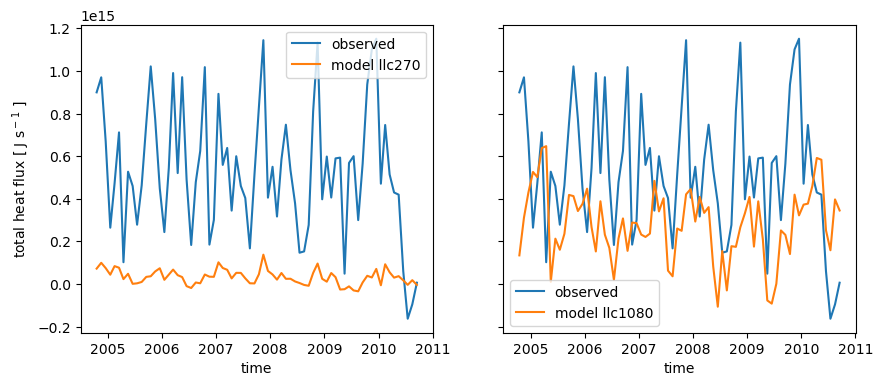

In [75]:
fig,ax = plt.subplots(ncols=2, nrows=1,figsize=(10,4),sharex=True,sharey=True,)

tot_heat_flux_obs.plot(ax=ax[0],label='observed')
tot_heat_flux_obs.plot(ax=ax[1],label='observed')

tot_heat_flux_1080.plot(ax=ax[1],label='model llc1080')
tot_heat_flux_270.plot(ax=ax[0],label='model llc270')
ax[0].set_ylabel('total heat flux [ J s$^-$$^1$ ]')
ax[1].set_ylabel('')

ax[0].legend()
ax[1].legend()

plt.savefig('./heat_flux_total.png')

In [31]:
p = gsw.p_from_z(np.array(ds['depth'][3]),np.array(ds['lat'][5]))


nan

In [ ]:
gsw.cp_t_exact(SA, t, p)

In [14]:
ds

<xarray.Dataset>
Dimensions:           (time: 72, x: 7, depth: 57)
Coordinates:
  * time              (time) datetime64[ns] 2004-10-16T12:00:00 ... 2010-09-1...
  * x                 (x) float32 180.0 185.9 190.0 195.0 201.4 205.0 210.0
  * depth             (depth) float32 200.0 204.0 208.0 ... 480.0 490.0 500.0
Data variables: (12/16)
    salinity_1080     (time, depth, x) float64 ...
    temperature_1080  (time, depth, x) float64 ...
    salinity_270      (time, depth, x) float64 ...
    temperature_270   (time, depth, x) float64 ...
    area              (x, depth) float32 ...
    lat               (x) float32 ...
    ...                ...
    velocity_270      (time, depth, x) float64 ...
    u_1080            (time, depth, x) float64 ...
    v_1080            (time, depth, x) float64 ...
    u_270             (time, depth, x) float64 ...
    v_270             (time, depth, x) float64 ...
    velocity_1080     (time, depth, x) float64 ...